# Week 8 handin

## 01 Assigment
https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/08-Exercise.ipynb

## 02 Status
I believe everything up untill the linear regression is done correctly

## 03 Solutions

### Download the Data

In [1]:
import requests
import pandas as pd

In [2]:
data = requests.get('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv').content
file =  open('./data/car_data.csv', 'wb')
file.write(data)
file.close()

In [3]:
df = pd.read_csv('./data/car_data.csv')

In [4]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [5]:
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### Feature Engineering

In [6]:
mask = (df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')
df = df[mask]
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [7]:
# df
outlier_mask = (df['Fuel Information.Highway mpg'].astype(float) < df['Fuel Information.Highway mpg'].astype(float).quantile(0.90)) &\
               (df['Engine Information.Engine Statistics.Horsepower'].astype(float) < df['Engine Information.Engine Statistics.Horsepower'].astype(float).quantile(0.90))
outliers_df = df[outlier_mask].reset_index()
pd.set_option('display.max_rows', 10)
outliers_df

,index,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
1,103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
2,104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
3,106,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX Coup,Honda,2010 Honda Accord Coupe,2010,190,162
4,107,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord LX-S Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
135,5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
136,5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
137,5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [10]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
cols = outliers_df[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]
d = scaler.fit_transform(cols)
normalized_df = pd.DataFrame(d, columns=cols.columns)
normalized_df

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.733333,0.548872
1,0.733333,0.548872
2,0.733333,0.548872
3,0.733333,0.548872
4,0.733333,0.548872
...,...,...
134,0.333333,1.000000
135,0.266667,1.000000
136,0.333333,1.000000
137,0.266667,1.000000


### Linear Regression

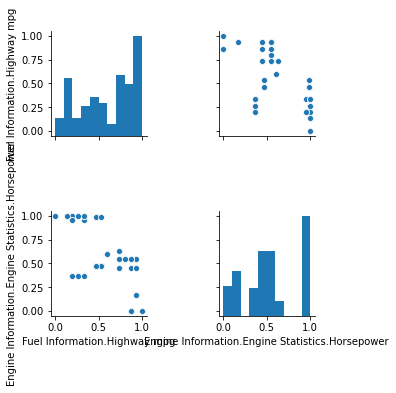

In [11]:
import seaborn as sb
sb.pairplot(normalized_df)

In [21]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import numpy as np

In [41]:
x = normalized_df['Engine Information.Engine Statistics.Horsepower'].astype(float)
y = normalized_df['Fuel Information.Highway mpg'].astype(float)
x_reshape = np.array(x).reshape(-1, 1)
print(x.shape)
print(x_reshape.shape)
print(x_reshape)

(139,)
(139, 1)
[[0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.47368421]
 [0.

In [42]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_reshape, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model.coef_

array([-0.68515772])

In [44]:
model.intercept_

0.9776990886223593

In [45]:
predicted = model.predict(x_reshape)
yto1x = model.predict([[1]])
print(yto1x)
predicted

[0.29254137]


array([0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.60163508,
       0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.60163508,
       0.60163508, 0.66860538, 0.66860538, 0.66860538, 0.66860538,
       0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.66860538,
       0.66860538, 0.66860538, 0.66860538, 0.60163508, 0.60163508,
       0.60163508, 0.85921317, 0.85921317, 0.85921317, 0.56557415,
       0.85921317, 0.85921317, 0.85921317, 0.85921317, 0.56557415,
       0.85921317, 0.85921317, 0.85921317, 0.85921317, 0.85921317,
       0.85921317, 0.56557415, 0.85921317, 0.85921317, 0.85921317,
       0.85921317, 0.85921317, 0.56557415, 0.97769909, 0.97769909,
       0.97769909, 0.97769909, 0.97769909, 0.97769909, 0.97769909,
       0.97769909, 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.72527256, 0.72527256, 0.72527256, 0.72527256, 0.72527

-0.6851577160316025 0.9776990886223587


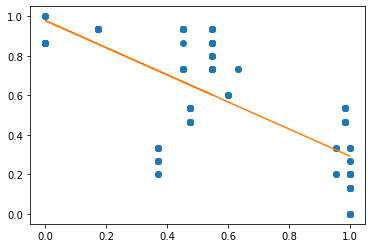

In [49]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
print(m, b)
plt.plot(x, m*x + b)